# Proyek Analisis Data: [Pengukuran Parameter PM10 dan CO pada Udara Kota Dingling]
- **Nama:** [Fardhan Roiza]
- **Email:** [b25b9d061@student.devacademy.id]
- **ID Dicoding:** [froizatech]

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan kadar CO dan PM10 di kota Dingling pada Pada rentang tahun 2013-2017?
- Bagaimana pengaruh suhu, tekanan, dan hujan terhadap kadar CO dan PM10 di udara kota Dingling?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


**Insight:**
- Terdapat beberapa parameter pengukuran udara yang diukur di kota Dingling seperti PM2.5, PM10, SO2, NO2, CO, dan O3.
- Terdapat pengukuran parameter lain seperti suhu, tekanan, DEWP, curah hujan, arah angin, dan WSPM.

### Assessing Data

In [3]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- data No, year (tahun), month (bulan), day (hari), dan hour (jam) tidak ada koma sehingga termasuk data integer
- data PM2.5 sampai RAIN (curah hujan) dan WSPM adalah nilai pengukuran berupa angka berkoma, sehingga termasuk data float
- data wd (arah angin) dan station adalah data kategorik sehingga dinamai object
- jumlah data yang tidak null (NaN) berbeda-beda. Artinya setiap kolom data terdapat data NaN yang beragam

In [4]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())
dingling_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**
- tidak ada data duplikat pada database ini

In [5]:
dingling_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


**Insight:**
- terdapat data null (NaN) pada kolom data PM2.5 sampai WSPM yang berupa kelompok data float

### Cleaning Data

In [6]:
dingling_df['PM2.5'] = dingling_df['PM2.5'].fillna(0)
dingling_df['PM10'] = dingling_df['PM10'].fillna(0)
dingling_df['SO2'] = dingling_df['SO2'].fillna(0)
dingling_df['NO2'] = dingling_df['NO2'].fillna(0)
dingling_df['CO'] = dingling_df['CO'].fillna(0)
dingling_df['O3'] = dingling_df['O3'].fillna(0)

dingling_df['TEMP'] = dingling_df['TEMP'].interpolate(method='linear', limit_direction='forward')
dingling_df['PRES'] = dingling_df['PRES'].interpolate(method='linear', limit_direction='forward')
dingling_df['DEWP'] = dingling_df['DEWP'].interpolate(method='linear', limit_direction='forward')
dingling_df['RAIN'] = dingling_df['RAIN'].interpolate(method='linear', limit_direction='forward')
dingling_df['WSPM'] = dingling_df['WSPM'].interpolate(method='linear', limit_direction='forward')

dingling_df['wd'] = dingling_df['wd'].fillna('UNDETECTED')

dingling_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Mengganti nilai parameter PM2.5, PM10, SO2, NO2, O3, dan CO yang berupa NaN menjadi 0
- Mengganti nilai parameter TEMP, PRES, DEWP, RAIN, dan WSPM yang NaN sesuai alur waktu
- Mengganti nilai WD yang NaN menjadi "UNDETECTED"

## Exploratory Data Analysis (EDA)

### Explore dingling_df

In [7]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,64.523440,82.173066,11.505033,26.614657,852.972422,66.175061,13.671605,1007.771151,1.486924,0.060293,1.854871
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.119274,79.606843,15.448218,26.409260,901.904067,54.291701,11.367457,10.226075,13.828895,0.752357,1.310748
min,1.000000,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,13.000000,24.000000,2.000000,8.000000,300.000000,27.000000,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,39.000000,58.000000,5.000000,18.000000,600.000000,59.119200,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,91.000000,116.000000,14.000000,37.000000,1100.000000,89.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**
- Nilai minimum parameter PM10 dan CO yang terukur adalah 0, sedangkan maksimumnya adalah 905 untuk PM10 dan 10000 untuk CO

In [8]:
dingling_df['date'] = pd.to_datetime(dingling_df[['year', 'month', 'day']])
cols = dingling_df.columns.tolist()  # ubah jadi list
cols.insert(cols.index('No') + 1, cols.pop(cols.index('date')))
df = dingling_df[cols]

dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,3.0,0.0,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01
1,2,2013,3,1,1,7.0,7.0,3.0,0.0,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01
3,4,2013,3,1,3,6.0,6.0,3.0,0.0,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01
4,5,2013,3,1,4,5.0,5.0,3.0,0.0,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01


Menambah kolom baru berupa date

In [9]:

dingling_df['date'] = pd.to_datetime(dingling_df[['year', 'month', 'day']])


dingling_df['date'] = dingling_df['date'] + pd.to_timedelta(dingling_df['hour'], unit='h')


cols = dingling_df.columns.tolist()
cols.insert(cols.index('No') + 1, cols.pop(cols.index('date')))
dingling_df = dingling_df[cols]

dingling_df.head()

,No,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,3.0,0.0,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013-03-01 01:00:00,2013,3,1,1,7.0,7.0,3.0,0.0,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013-03-01 02:00:00,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,3.0,0.0,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013-03-01 04:00:00,2013,3,1,4,5.0,5.0,3.0,0.0,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


Menambah keterangan hour di dalam kolom date

In [10]:
dingling_df.groupby(by=['year']).agg({
    'CO': ['min', 'max', 'std'],
    'PM10': ['min','max', 'std'],
    'TEMP': ['min','max'],
    'PRES': ['min','max'],
    'RAIN': ['min','max']

})

CO                       PM10                         TEMP        \
      min      max          std  min    max        std        min   max   
year                                                                      
2013  0.0   5100.0   674.165548  0.0  720.0  70.637785  -9.600000  37.9   
2014  0.0   6900.0   802.899816  0.0  895.0  83.487134 -10.900000  41.4   
2015  0.0   9400.0  1013.397765  0.0  905.0  85.383104 -10.300000  39.2   
2016  0.0   9400.0   942.009386  0.0  864.0  75.965670 -16.600000  38.1   
2017  0.0  10000.0  1284.620716  0.0  553.0  80.959930  -9.966667  15.6   

       PRES         RAIN        
        min     max  min   max  
year                            
2013  982.9  1027.9  0.0  25.3  
2014  984.4  1032.0  0.0  21.6  
2015  982.4  1033.1  0.0  52.1  
2016  985.4  1036.5  0.0  22.7  
2017  997.2  1031.2  0.0   0.6

In [11]:
dingling_df.groupby(by=['year', 'month']).agg({
    'CO': ['min', 'max', 'std'],
    'PM10': ['min','max', 'std'],
    'TEMP': ['min','max'],
    'PRES': ['min','max'],
    'RAIN': ['min','max']


})

CO                       PM10                          TEMP  \
            min      max          std  min    max         std        min   
year month                                                                 
2013 3      0.0   4900.0   760.675821  0.0  717.0   98.056280  -5.700000   
     4      0.0   3200.0   491.197320  0.0  409.0   65.953029   1.000000   
     5      0.0   2500.0   529.570316  0.0  351.0   75.139136   9.200000   
     6      0.0   3500.0   797.819192  0.0  388.0   68.301467  15.500000   
     7      0.0   3000.0   490.641003  0.0  226.0   44.673807  20.000000   
     8      0.0   2300.0   394.759738  0.0  243.0   42.208898  17.200000   
     9      0.0   2900.0   503.810803  0.0  298.0   56.726465   8.900000   
     10     0.0      0.0     0.000000  0.0  365.0   76.663955   2.800000   
     11     0.0   2600.0   431.182835  0.0  720.0   72.800570  -4.500000   
     12     0.0   5100.0   996.806722  0.0  305.0   60.159540  -9.600000   
2014 1      0.0   4700.0   951.620604  0.0  404.0   76.061903 -10.600000   
     2      0.0   4900.0  1264.279090  0.0  487.0  120.264608 -10.900000   
     3      0.0   6900.0  1014.733420  0.0  895.0  103.062100  -4.500000   
     4      0.0   2200.0   436.944561  0.0  558.0   85.840898   4.800000   
     5      0.0   2800.0   430.663431  0.0  492.0   60.616200   7.600000   
     6      0.0   3400.0   354.197952  0.0  172.0   33.693661  15.100000   
     7      0.0   2900.0   463.999325  0.0  261.0   61.501910  20.200000   
     8      0.0   1900.0   354.745906  0.0  232.0   50.669501  16.600000   
     9      0.0   2000.0   418.905321  0.0  225.0   49.413382  10.700000   
     10     0.0   3000.0   651.557893  0.0  391.0  108.829374   2.100000   
     11     0.0   4200.0   889.107404  0.0  623.0   91.242971  -4.100000   
     12     0.0   4900.0   978.524216  0.0  497.0   64.375318  -9.600000   
2015 1      0.0   7400.0  1199.175054  0.0  443.0   84.374081  -8.000000   
     2      0.0   4500.0  1051.745949  3.0  905.0  116.436542 -10.000000   
     3      0.0   4100.0   686.639412  0.0  646.0  103.570934  -6.400000   
     4      0.0   2600.0   334.813589  0.0  676.0   72.634259   1.300000   
     5      0.0   2300.0   380.468611  0.0  675.0   68.461255   7.800000   
     6      0.0   7000.0   808.693098  0.0  249.0   60.992667  16.000000   
     7      0.0   2600.0   297.204251  3.0  294.0   41.532925  16.800000   
     8      0.0   1500.0   260.567756  0.0  650.0   65.330262  18.900000   
     9      0.0   2100.0   338.928357  0.0  286.0   46.566552  10.300000   
     10     0.0   2500.0   498.138694  0.0  318.0   71.019688   1.500000   
     11     0.0   5800.0   976.132059  0.0  297.0   63.146949 -10.300000   
     12     0.0   9400.0  1978.529740  0.0  771.0  136.351630  -9.700000   
2016 1      0.0   6200.0  1497.516812  0.0  392.0   68.731651 -16.600000   
     2      0.0   8600.0   796.683567  0.0  864.0   58.839517  -8.100000   
     3      0.0   6000.0   897.471317  0.0  641.0  113.728759  -4.800000   
     4      0.0   2600.0   493.994044  0.0  792.0   87.796909   6.100000   
     5      0.0   2700.0   372.887155  0.0  828.0   70.170426   7.000000   
     6      0.0   1500.0   287.615920  0.0  207.0   40.911986  16.700000   
     7      0.0   1700.0   341.055574  0.0  221.0   42.024577  18.700000   
     8      0.0   2200.0   346.452537  0.0  149.0   30.997385  17.100000   
     9      0.0   1900.0   345.323416  0.0  193.0   42.460191   7.800000   
     10     0.0   2500.0   507.043188  0.0  414.0   70.487148  -1.400000   
     11     0.0   4100.0  1040.687894  0.0  414.0   80.322483  -7.400000   
     12     0.0   9400.0  1703.323941  0.0  493.0   95.917845  -9.000000   
2017 1      0.0  10000.0  1564.992928  0.0  553.0   90.799501  -9.966667   
     2      0.0   3700.0   786.843920  0.0  405.0   65.636317  -9.000000   

                    PRES         RAIN        
             max     min     max  min   max  
year month                                  

Nilai minimum, maksimum, dan std setiap parameter pada bulan dan tahun tertentu

In [12]:
dingling_df[['CO', 'PM10', 'TEMP', 'PRES', 'RAIN']].corr()

,CO,PM10,TEMP,PRES,RAIN
CO,1.000000,0.661732,-0.269312,0.151065,-0.002887
PM10,0.661732,1.000000,-0.056015,-0.036827,-0.023901
TEMP,-0.269312,-0.056015,1.000000,-0.837857,0.035224
PRES,0.151065,-0.036827,-0.837857,1.000000,-0.058798
RAIN,-0.002887,-0.023901,0.035224,-0.058798,1.000000


Secara umum setiap parameter memiliki korelasi yang kecil karena nilainya sangat kecil (minus hanya menunjukkan perbandingan terbalik). Namun nilai korelasi yang lebih besar didapat pada:
- korelasi antara TEMP dan PRES (-0.837857)
- korelasi antara PM10 dan CO (0.661732)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan kadar CO dan PM10 di kota Dingling pada Pada rentang tahun 2013-2017?

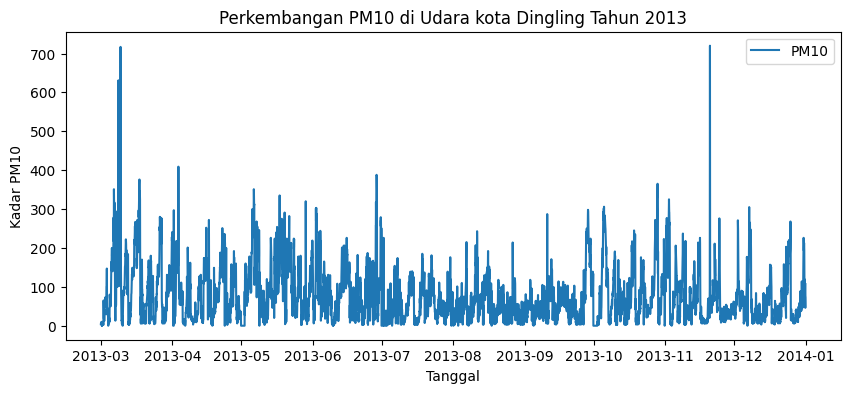

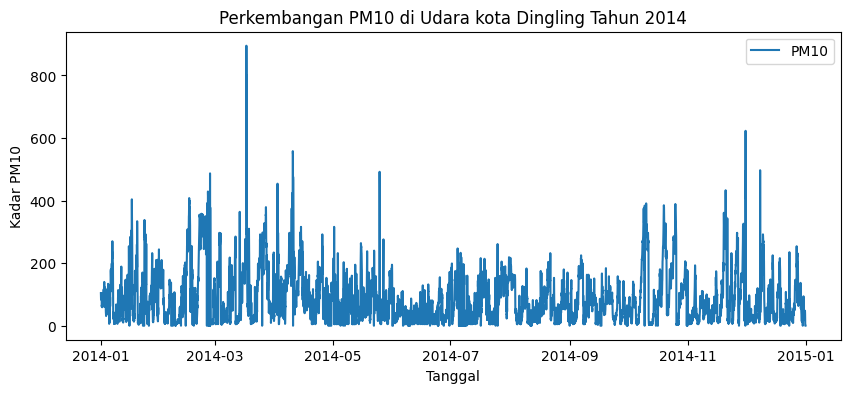

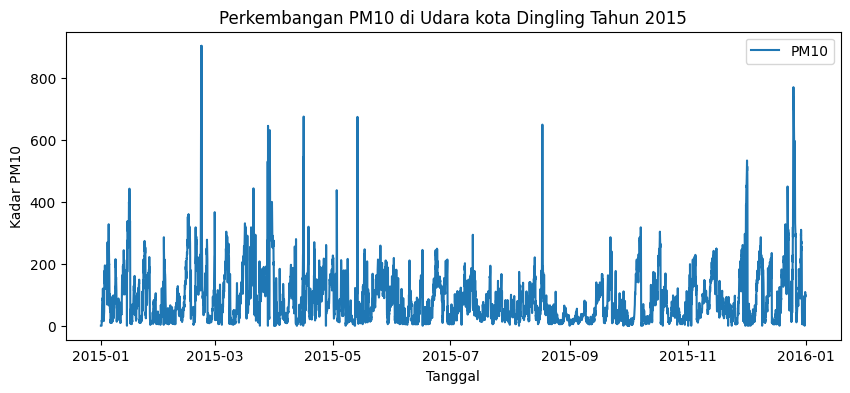

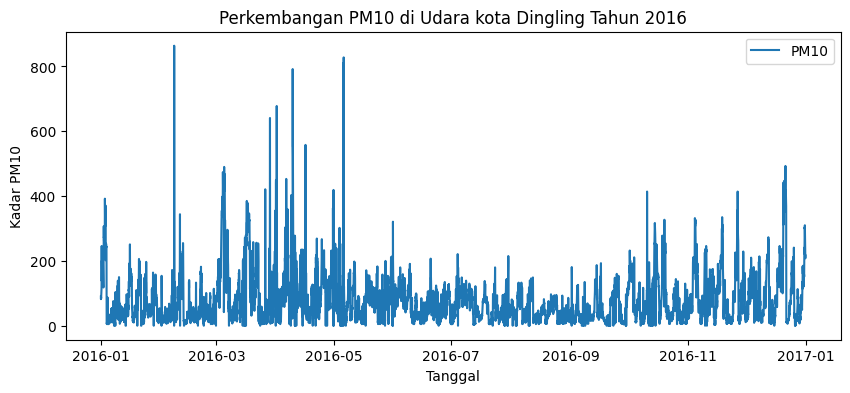

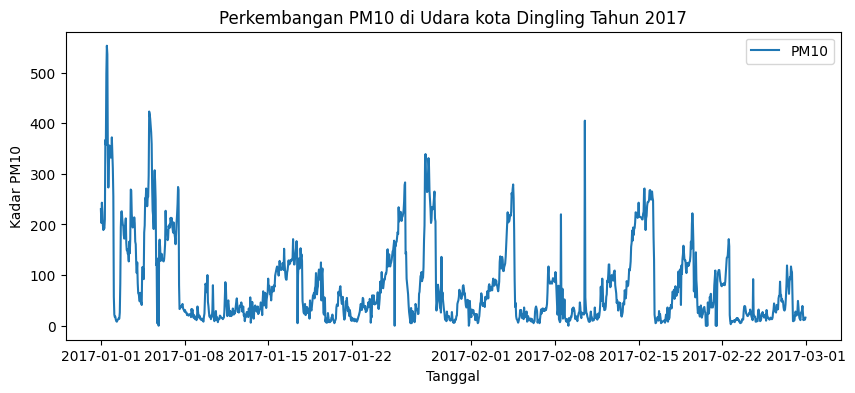

In [13]:
for year in [2013, 2014, 2015, 2016, 2017]:
    df_y = dingling_df[dingling_df['date'].dt.year == year]
    plt.figure(figsize=(10, 4))
    plt.plot(df_y['date'], df_y['PM10'], label='PM10')
    plt.title(f'Perkembangan PM10 di Udara kota Dingling Tahun {year}')
    plt.xlabel('Tanggal')
    plt.ylabel('Kadar PM10')
    plt.legend()
    plt.show()

Grafik garis Perkembangan PM10 di Udara kota Dingling pada rentang tahun 2013-2017

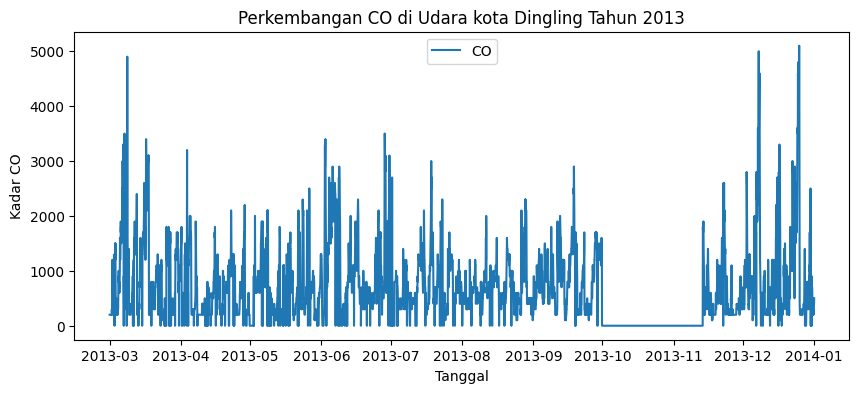

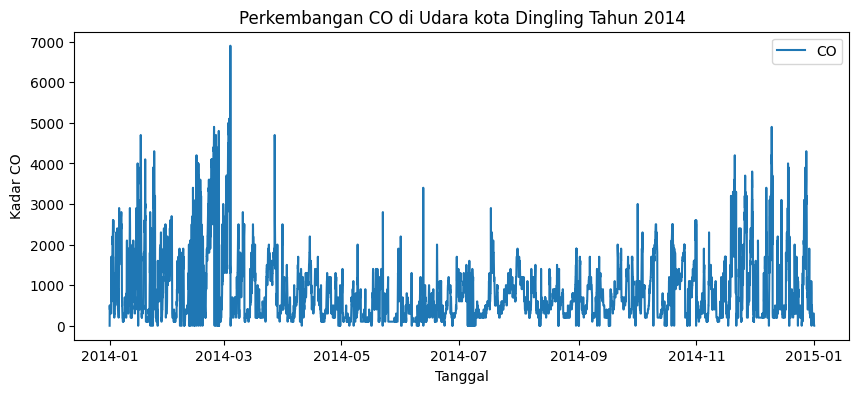

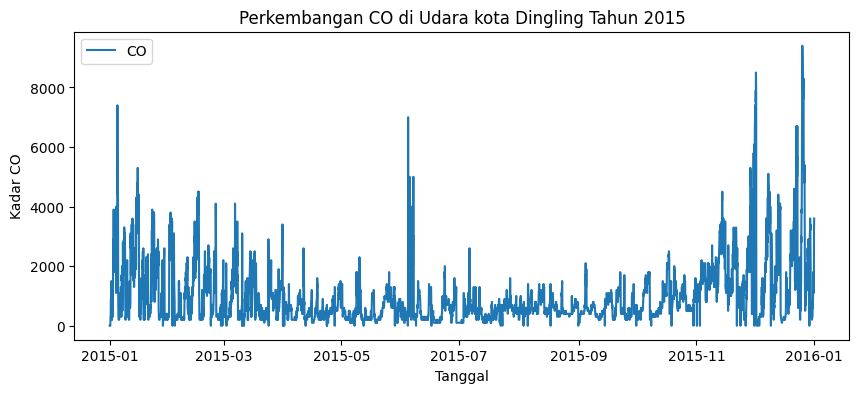

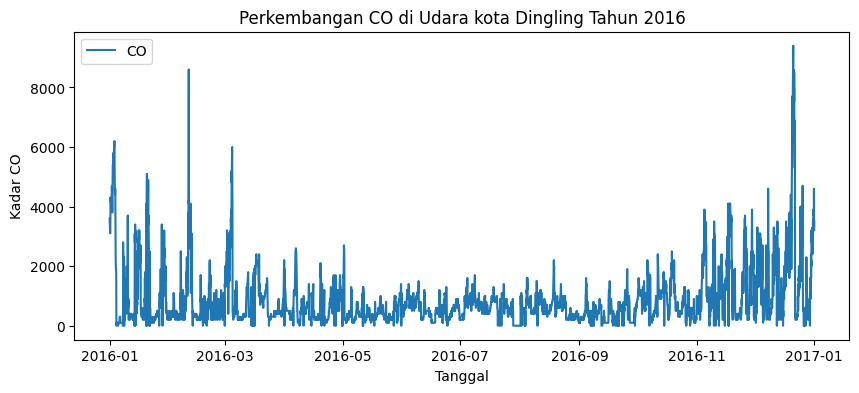

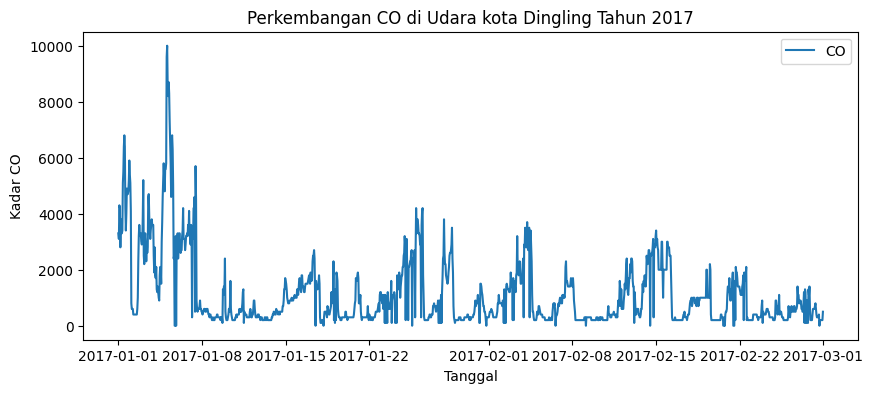

In [14]:
for year in [2013, 2014, 2015, 2016, 2017]:
    df_y = dingling_df[dingling_df['date'].dt.year == year]
    plt.figure(figsize=(10, 4))
    plt.plot(df_y['date'], df_y['CO'], label='CO')
    plt.title(f'Perkembangan CO di Udara kota Dingling Tahun {year}')
    plt.xlabel('Tanggal')
    plt.ylabel('Kadar CO')
    plt.legend()
    plt.show()

Grafik garis Perkembangan CO di Udara kota Dingling pada rentang tahun 2013-2017

**Insight:**
- Perkembangan kadar CO dan PM10 di kota Dingling pada tahun 2013-2017 ditampilkan pada Grafik garis diatas.


### Pertanyaan 2: Bagaimana pengaruh suhu, tekanan, dan hujan terhadap kadar CO dan PM10 di udara kota Dingling?

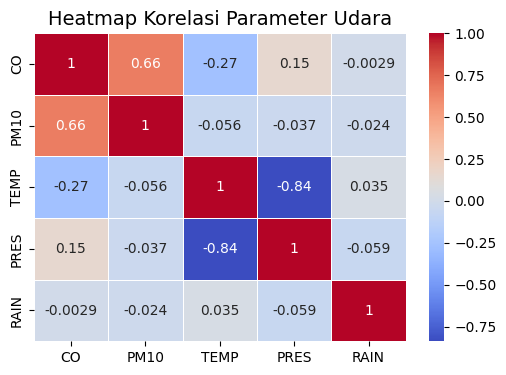

In [15]:
korelasi_udara = dingling_df[['CO', 'PM10', 'TEMP', 'PRES', 'RAIN']].corr()

# Buat heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(korelasi_udara, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Parameter Udara', fontsize=14)
plt.show()

**Insight:**
- Pada hubungan antara CO dan suhu, nilai yang didapat adalah -0,27. Nilai korelasi bernilai mendekati 0 dan negatif sehingga suhu tidak memengaruhi CO secara signifikan.
- Pada hubungan antara CO dan tekanan, nilai yang didapat adalah 0,15. Nilai korelasi bernilai mendekati 0 dan positif sehingga tekanan tidak memengaruhi CO secara signifikan.
- Pada hubungan antara CO dan curah hujan, nilai yang didapat adalah -0,0029. Nilai korelasi bernilai mendekati 0 dan negatif sehingga curah hujan tidak memengaruhi CO secara signifikan.
- Pada hubungan antara PM10 dan suhu, nilai yang didapat adalah -0,0056. Nilai korelasi bernilai mendekati 0 dan negatif sehingga suhu tidak memengaruhi PM10 secara signifikan.
- Pada hubungan antara PM10 dan tekanan, nilai yang didapat adalah -0,037. Nilai korelasi bernilai mendekati 0 dan negatif sehingga tekanan tidak memengaruhi CO secara signifikan.
- Pada hubungan antara PM10 dan curah hujan, nilai yang didapat adalah -0,024. Nilai korelasi bernilai mendekati 0 dan negatif sehingga curah hujan tidak memengaruhi CO secara signifikan.


## Conclusion

- Perkembangan PM10 dan CO yang terukur setiap harinya dari tahun 2013-2017 pada kota Dingling tercantum pada diagram garis. Nilai terendah PM10 dan CO yang terukur adalah 0 dan yang terbesar adalah 10000 untuk CO pada Januari 2017 serta 905 untuk PM10 pada Februari 2015
- Nilai korelasi antara suhu, tekanan, dan curah hujan terhadap PM10 dan CO sangat kecil, sehingga setiap parameter tidak memiliki hubungan pengaruh yang signifikan.

Saran:
- Mencari tahu lebih lanjut apa yang terjadi pada Kota Dingling selama Februari 2015 dan Januari 2017. Mengingat kedua tahun tersebut terdapat nilai CO da PM10 yang sangat besar. Bisa saja berupa kegiatan industri yang besar, volume kendaraan bermotor yang berlebih, atau lainnya.
- Dikarenakan korelasi antara faktor luar seperti suhu, tekanan, dan curah hujan dengan PM10 dan CO sangat kecil, adanya faktor luar tidak memengaruhi besar-kecilnya nilai PM10 dan CO secara signifikan. Besar kemungkinan kenaikan-penurunan nilai PM10 dan CO disebabkan oleh faktor lain seperti volume kendaraan bermotor, industri, dan lainnya. Hal tersebut perlu dicari tahu lebih lanjut.

In [16]:
dingling_df.to_csv("dingling_data.csv", index=False)